# 산점도(Scatter plot)

In [1]:
import pandas as pd
import seaborn as sns # 그래프를 만들 때 사용하는 패키지

mpg = pd.read_csv('Data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:xlabel='displ', ylabel='hwy'>

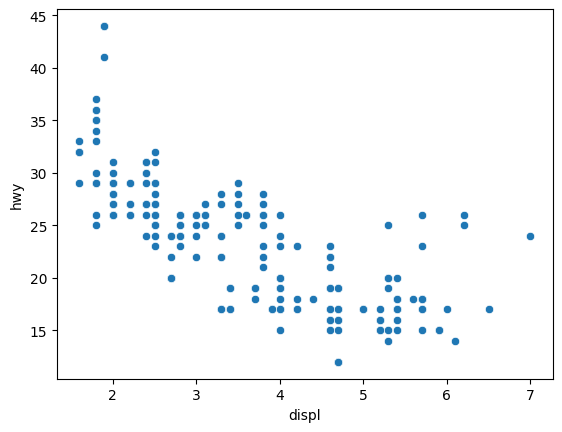

In [2]:
# x축은 displ, y축은 hwy를 나타낸 산점도 - p.200
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0), (10.0, 30.0)]

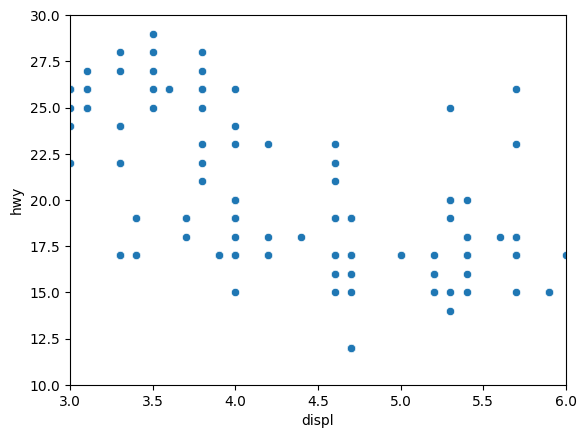

In [3]:
# 축 범위 설정하기 - p.200
# sns.set(xlim = (최소, 최대), ylim = (최소, 최대))
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = (3, 6), ylim = (10, 30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

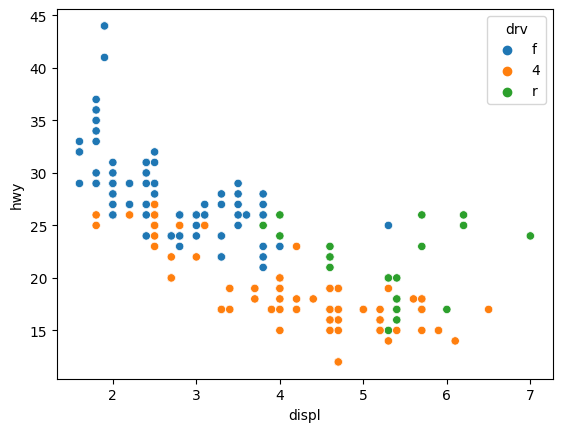

In [4]:
# 종류별로 표식 색상 바꾸기 - p.202
# 매개변수로 hue = '변수명' 추가
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

# 막대그래프 (Bar plot)

In [5]:
hwy_mean = mpg.groupby('drv').agg(hwy_mean = ('hwy', 'mean'))
hwy_mean

,hwy_mean
drv,
4,19.174757
f,28.160377
r,21.000000


In [6]:
# seaborn으로 그래프를 만드려면 drv가 인덱스가 아니라 변수에 담겨 있어야 한다. as_index = False 매개변수로 추가
hwy_mean = mpg.groupby('drv', as_index = False).agg(hwy_mean = ('hwy', 'mean'))
hwy_mean

,drv,hwy_mean
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='hwy_mean'>

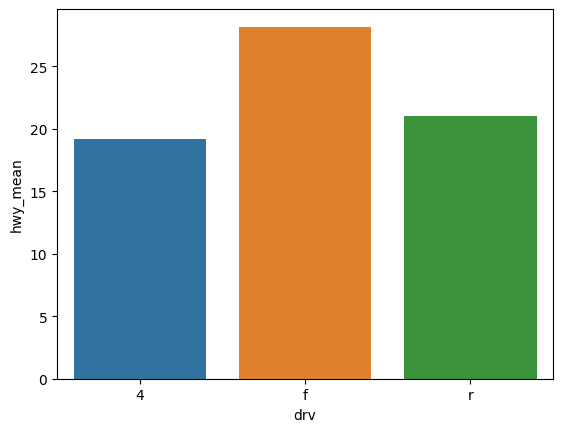

In [7]:
# 막대그래프 만들기 - p.206
sns.barplot(data = hwy_mean, x = 'drv', y = 'hwy_mean')

<AxesSubplot:xlabel='drv', ylabel='hwy_mean'>

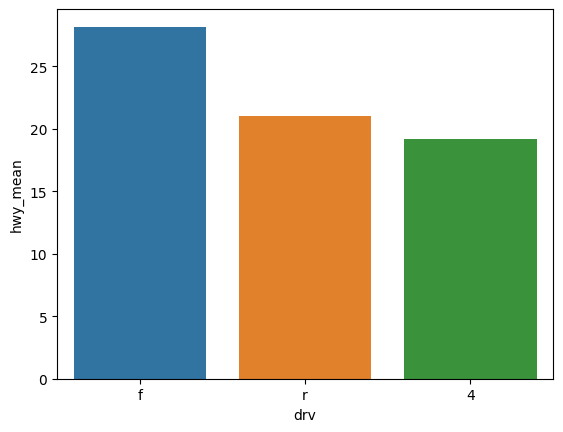

In [8]:
# 크기순 정렬
hwy_mean = hwy_mean.sort_values('hwy_mean', ascending = False)
sns.barplot(data = hwy_mean, x = 'drv', y = 'hwy_mean')

# 빈도 막대그래프(Count plot)

<AxesSubplot:xlabel='drv', ylabel='count'>

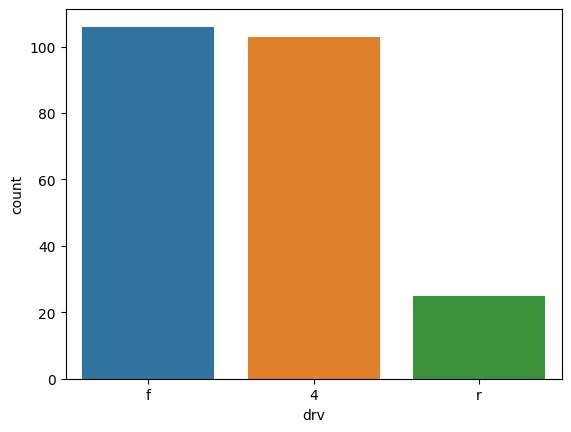

In [9]:
# 빈도 막대 그래프 - p.208
# sns.barplot() 대신 sns.countplot()을 이용하면 집단별 빈도표를 만드는 작업을 생략하고 빈도 막대 그래프를 만들 수 있다
sns.countplot(data = mpg, x = 'drv')

In [10]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

<AxesSubplot:xlabel='drv', ylabel='count'>

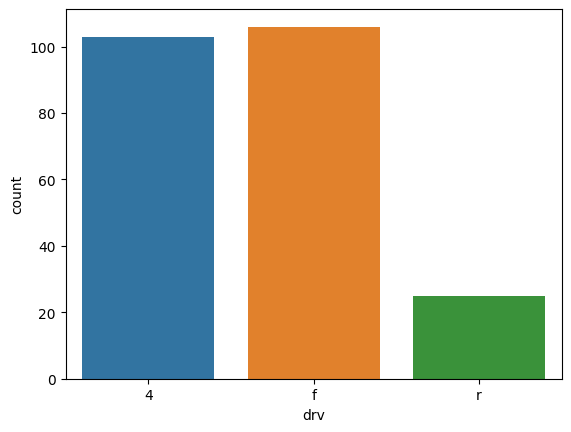

In [11]:
# 막대 정렬하기 - p.210
# 매개변수 order에 원하는 순서로 값을나열
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [12]:
# 빈도 순으로 출력하기 - p.210
mpg['drv'].value_counts().index # 빈도가 높은 순으로 변수의 값 출력

Index(['f', '4', 'r'], dtype='object')

<AxesSubplot:xlabel='drv', ylabel='count'>

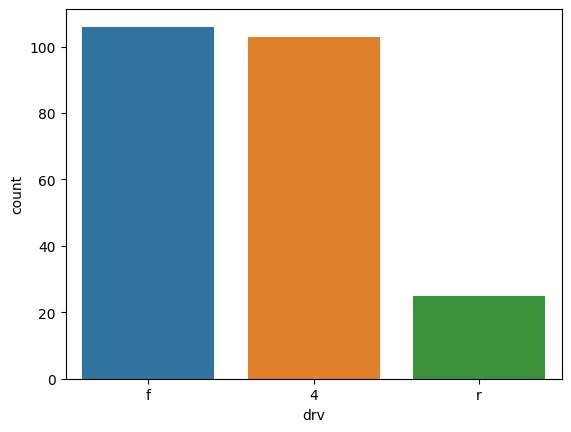

In [13]:
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index) # 빈도가 높은 순으로 막대 정렬

# 선 그래프(Line plot)

In [14]:
economics = pd.read_csv('Data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<AxesSubplot:xlabel='date', ylabel='unemploy'>

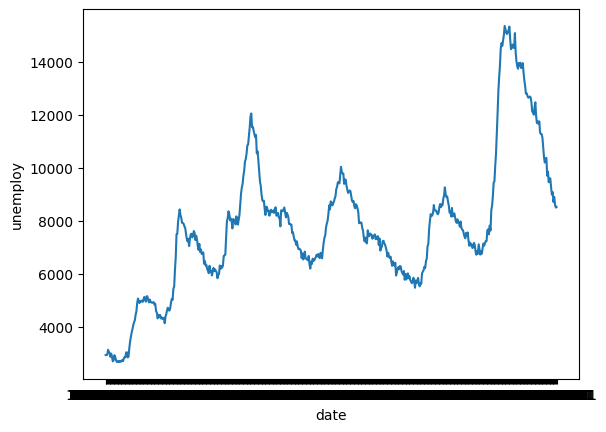

In [15]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')
# 출력된 그래프 아래의 굵은 선은 date변수 값이 여러 번 겹쳐 표시된 것

In [16]:
# 날짜시간타입(datetime64) 변수 만들기 - p.214
# 현재 economics의 date는 문자타입(object)으로 되어있다
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [17]:
economics['date'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    datetime64[ns]
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 27.0 KB


In [18]:
# df.dt를 이용하여 연, 월, 일 추출 - p.215
# dt.year  : 연
# dt.month : 월
# dt.day   : 일
economics['date'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date, Length: 574, dtype: int64

In [19]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [20]:
# 연도 변수 추가
economics['year'] = economics['date'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967


<AxesSubplot:xlabel='year', ylabel='unemploy'>

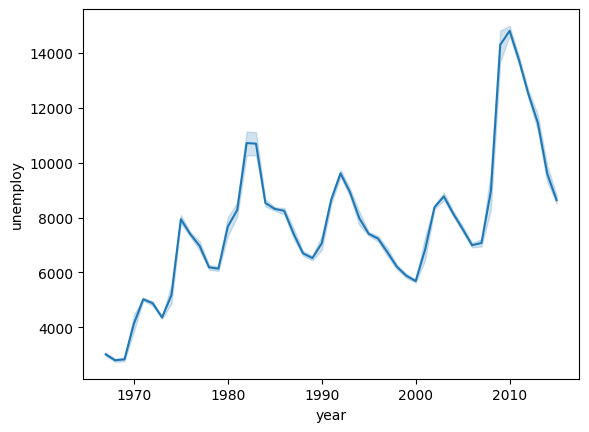

In [21]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

C:\Users\PGJeong\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='year', ylabel='unemploy'>

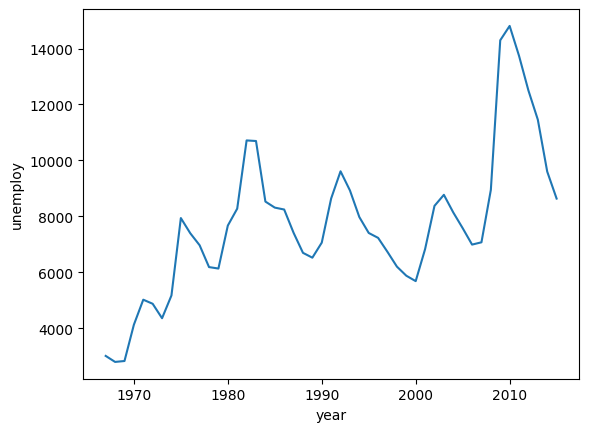

In [22]:
# 선의 위아래에 표시된 면적은 신뢰구간(Confidence Interval)
# 신뢰구간을 표시하지 않으려면 매개변수로 ci = None 입력
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

# 상자그림(Box plot)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

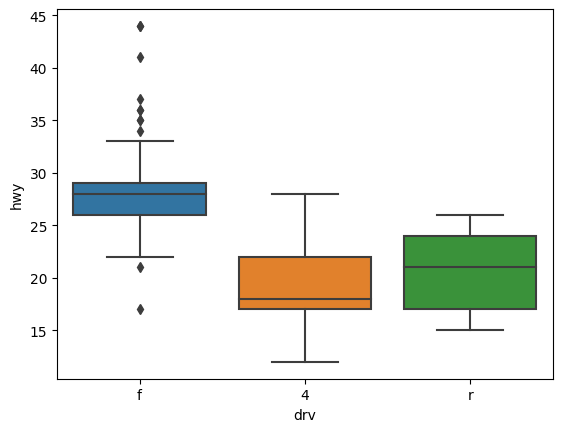

In [23]:
# 상자 그림 - p.201
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

In [24]:
# 1사분위수(Q1, pct25)  : 하위 25%  - 상자 밑면
# 2사분위수(Q2, pct50)  : 하위 50%  - 상자 내 가로선
# 3사분위수(Q3, pct75)  : 하위 75%  - 상자 윗면
# IQR = Q3 - Q1
# 하한(Infimum)   : Q1 - (IQR * 1.5)  - 상자 밖 가로선
# 상한(Supremum)  : Q3 + (IQR * 1.5)  - 상자 밖 가로선
# 극단치(Outlier) : 하한과 상한을 벗어난 값  - 상자 밖 점